In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Ensuring arrival_date is imported as datetime type
df = pd.read_csv('hotel_bookings_clean.csv', parse_dates=['arrival_date'])



## Check types (having a issue with date_arrival)

In [11]:
print("=== Data Types for Each Column ===")
print(df.dtypes)
print("\n=== Detailed DataFrame Information ===")
df.info()

=== Data Types for Each Column ===
hotel                                     object
is_canceled                                 bool
lead_time                                  int64
arrival_date_month                        object
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
market_segment                            object
distribution_channel                      object
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled              bool
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent                             

# Studying ADR vs ("is_cancelled" , "arrival_date-month", "market_segment", "distribution_channel", "deposit_type", "customer_type")


Overall Average Daily Rate: $103.65

=== ADR by is_canceled ===
True:
  Average ADR: $105.39 (1.68% from overall)
  Median ADR: $97.00
  Range: $0.50 to $450.00
  Count: 44114.0 bookings
False:
  Average ADR: $102.61 (-1.0% from overall)
  Median ADR: $95.00
  Range: $0.26 to $510.00
  Count: 73973.0 bookings

=== ADR by market_segment ===
Direct:
  Average ADR: $118.11 (13.95% from overall)
  Median ADR: $107.00
  Range: $2.00 to $451.50
  Count: 12291.0 bookings
Online TA:
  Average ADR: $118.03 (13.87% from overall)
  Median ADR: $110.00
  Range: $0.50 to $450.00
  Count: 56055.0 bookings
Aviation:
  Average ADR: $102.74 (-0.88% from overall)
  Median ADR: $95.00
  Range: $79.00 to $193.50
  Count: 231.0 bookings
Complementary:
  Average ADR: $96.62 (-6.78% from overall)
  Median ADR: $102.69
  Range: $1.00 to $170.00
  Count: 713.0 bookings
Offline TA/TO:
  Average ADR: $88.52 (-14.6% from overall)
  Median ADR: $87.00
  Range: $1.00 to $510.00
  Count: 23991.0 bookings
Groups:
  A

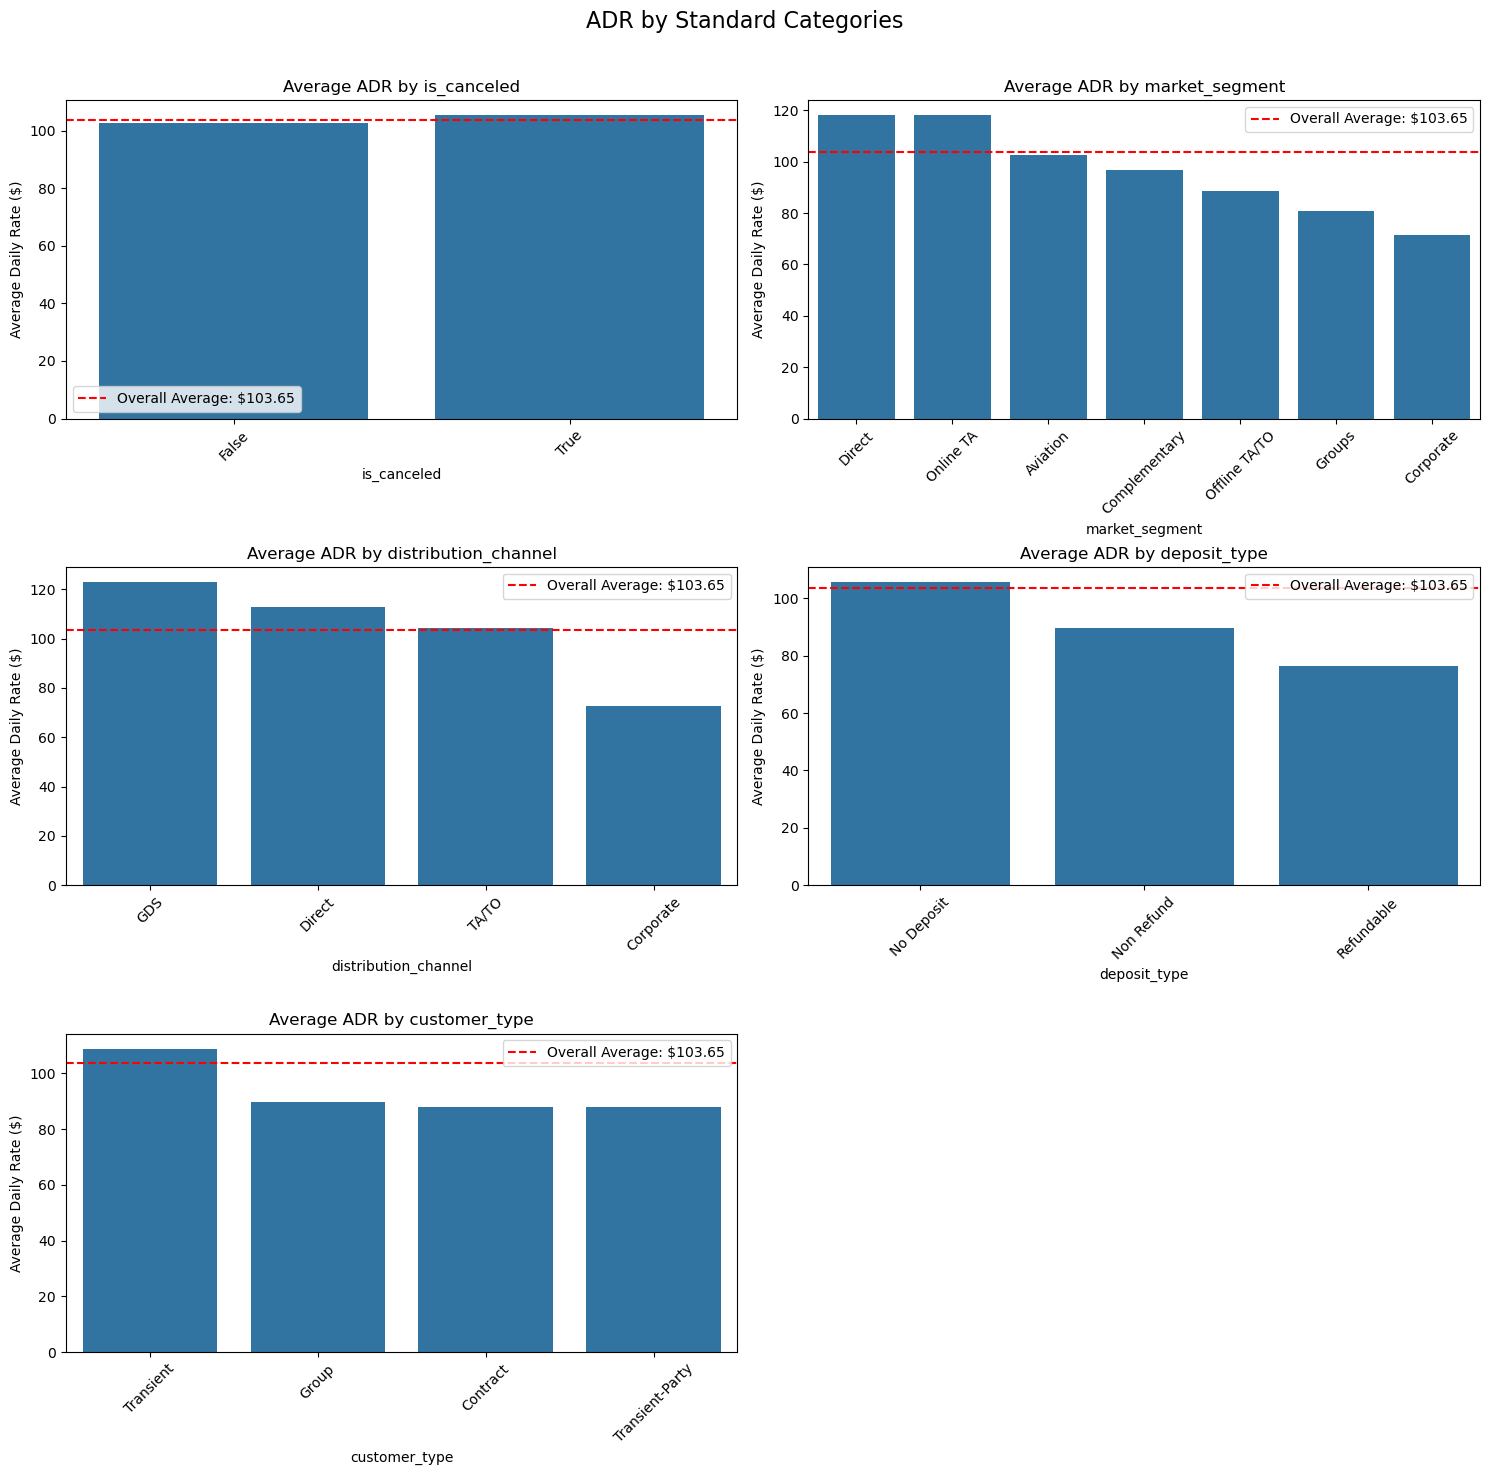


=== ADR by month ===
January:
  Average ADR: $72.57 (-29.99% from overall)
  Median ADR: $72.00
  Range: $1.00 to $284.20
  Count: 5816.0 bookings
February:
  Average ADR: $75.44 (-27.21% from overall)
  Median ADR: $75.00
  Range: $0.50 to $284.20
  Count: 7944.0 bookings
March:
  Average ADR: $81.81 (-21.07% from overall)
  Median ADR: $80.00
  Range: $0.26 to $285.00
  Count: 9661.0 bookings
April:
  Average ADR: $101.81 (-1.78% from overall)
  Median ADR: $98.00
  Range: $3.00 to $336.00
  Count: 11005.0 bookings
May:
  Average ADR: $110.37 (6.48% from overall)
  Median ADR: $108.00
  Range: $2.00 to $510.00
  Count: 11692.0 bookings
June:
  Average ADR: $117.91 (13.76% from overall)
  Median ADR: $115.00
  Range: $4.00 to $333.67
  Count: 10879.0 bookings
July:
  Average ADR: $128.36 (23.84% from overall)
  Median ADR: $118.80
  Range: $1.80 to $508.00
  Count: 12553.0 bookings
August:
  Average ADR: $141.54 (36.56% from overall)
  Median ADR: $130.50
  Range: $1.56 to $450.00
  

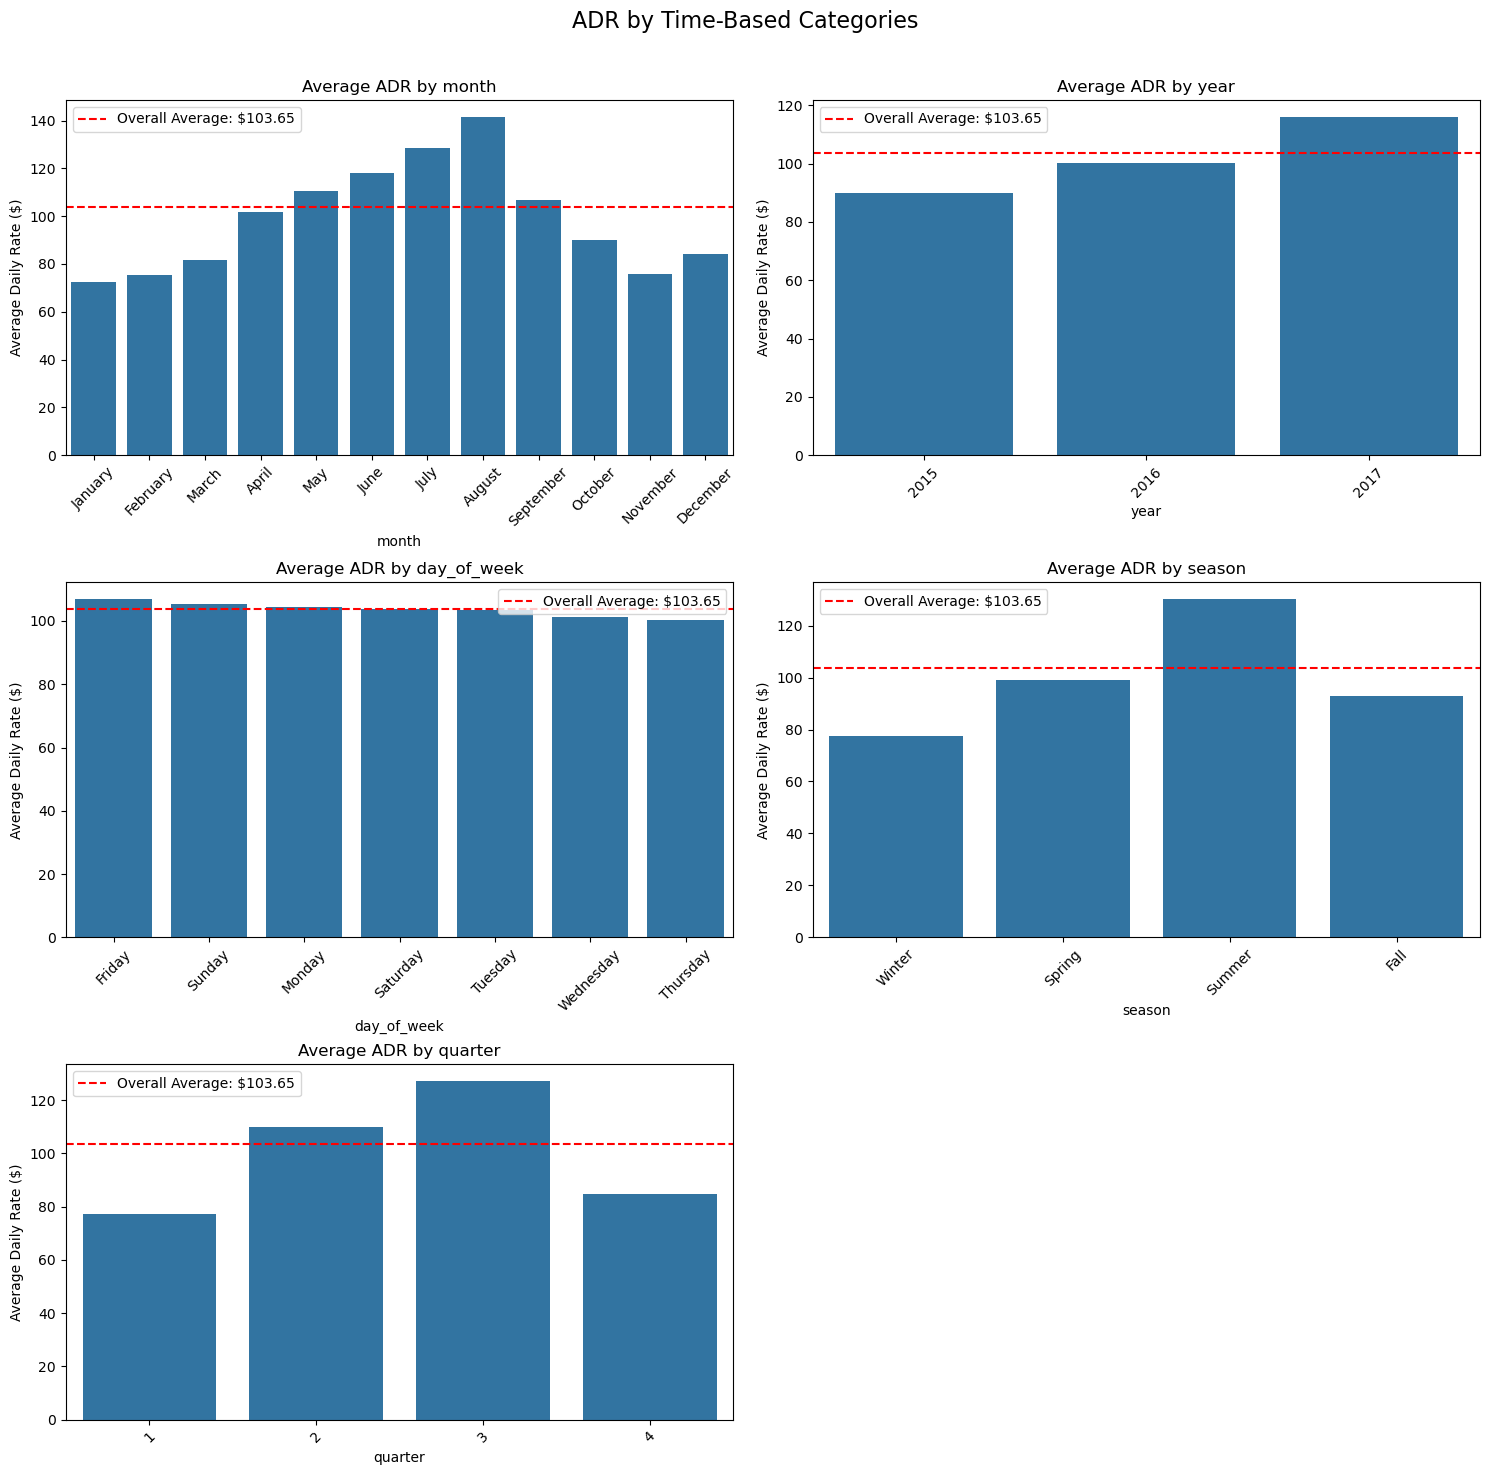

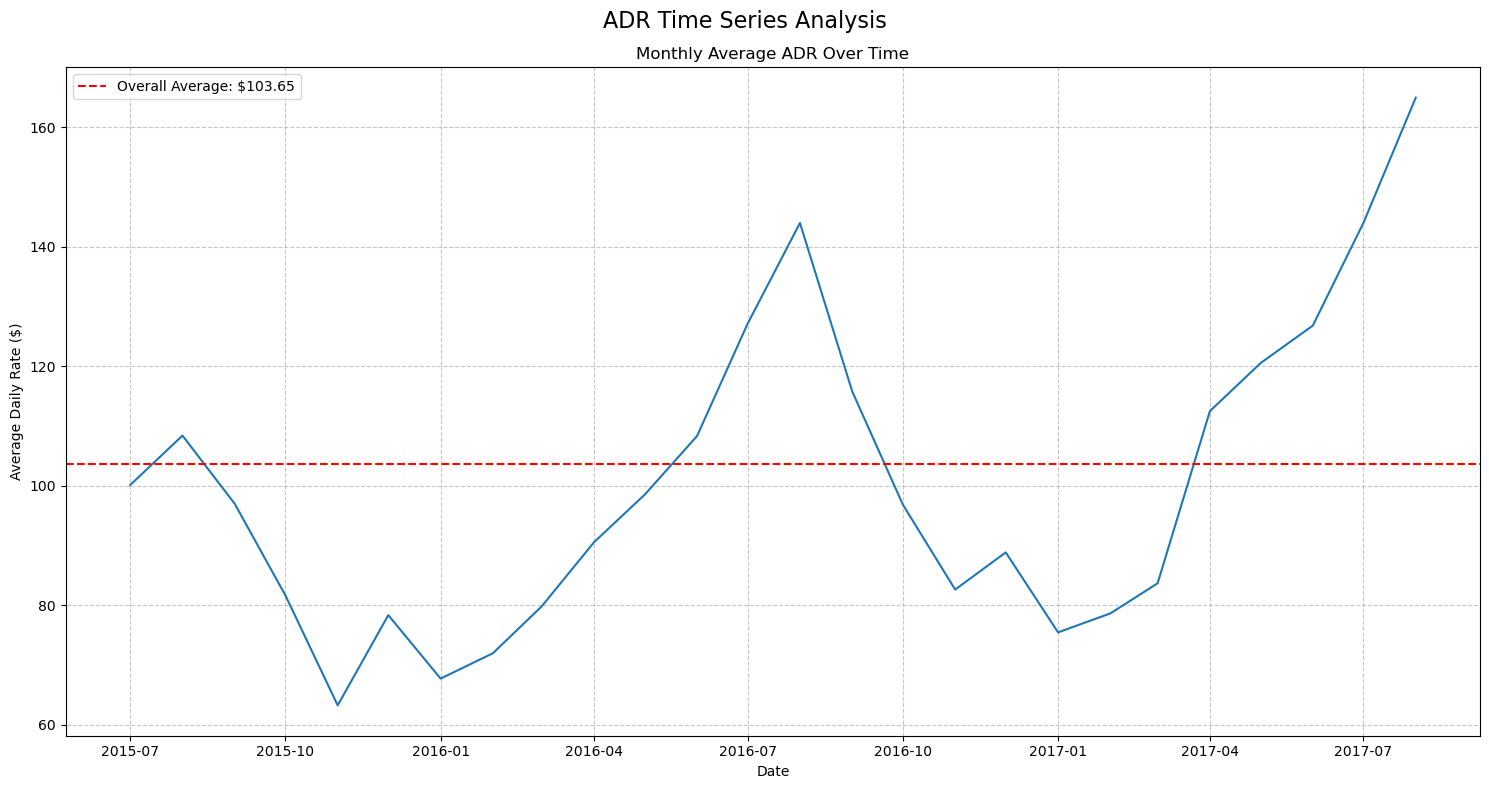


=== Statistical Significance (ANOVA) ===
is_canceled:
  F-statistic: 99.24
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
market_segment:
  F-statistic: 3171.77
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
distribution_channel:
  F-statistic: 1195.45
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
deposit_type:
  F-statistic: 802.64
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
customer_type:
  F-statistic: 1563.17
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
month:
  F-statistic: 3063.51
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
year:
  F-statistic: 2653.78
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
day_of_week:
  F-statistic: 

In [12]:
# Calculate the overall average for the ADR column
overall_adr_avg = df['adr'].mean()
print(f"Overall Average Daily Rate: ${overall_adr_avg:.2f}")

# Extract various date components for analysis
df['month'] = df['arrival_date'].dt.month_name()
df['year'] = df['arrival_date'].dt.year
df['day_of_week'] = df['arrival_date'].dt.day_name()
df['quarter'] = df['arrival_date'].dt.quarter

# Define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['arrival_date'].dt.month.apply(get_season)

# Create a function to compare ADR with a categorical column
def compare_adr_with_column(column_name):
    print(f"\n=== ADR by {column_name} ===")
    
    # Group by the column and calculate statistics for ADR
    grouped = df.groupby(column_name)['adr'].agg(['mean', 'median', 'count', 'min', 'max'])
    
    # Sort by categories for time-based columns to maintain chronological order
    if column_name in ['month', 'year', 'quarter', 'season']:
        if column_name == 'month':
            # Sort months chronologically
            month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                           'July', 'August', 'September', 'October', 'November', 'December']
            grouped = grouped.reindex(month_order)
        elif column_name == 'season':
            # Sort seasons chronologically
            season_order = ['Winter', 'Spring', 'Summer', 'Fall']
            grouped = grouped.reindex(season_order)
        elif column_name == 'day_of_week':
            # Sort days of week chronologically
            day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            grouped = grouped.reindex(day_order)
        else:
            # For year and quarter, sort numerically
            grouped = grouped.sort_index()
    else:
        # For non-time columns, sort by mean ADR
        grouped = grouped.sort_values('mean', ascending=False)
    
    # Calculate percentage difference from overall average
    grouped['diff_from_avg'] = ((grouped['mean'] - overall_adr_avg) / overall_adr_avg * 100).round(2)
    
    # Format the statistics
    for category, stats in grouped.iterrows():
        print(f"{category}:")
        print(f"  Average ADR: ${stats['mean']:.2f} ({stats['diff_from_avg']}% from overall)")
        print(f"  Median ADR: ${stats['median']:.2f}")
        print(f"  Range: ${stats['min']:.2f} to ${stats['max']:.2f}")
        print(f"  Count: {stats['count']} bookings")
    
    return grouped

# Compare ADR with standard categories
standard_columns = [
    'is_canceled',
    'market_segment', 
    'distribution_channel', 
    'deposit_type', 
    'customer_type'
]

# Time-based columns for comparison
time_columns = [
    'month',
    'year',
    'day_of_week',
    'season',
    'quarter'
]

# Create visualizations for standard categories
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
plt.suptitle('ADR by Standard Categories', fontsize=16)

for i, column in enumerate(standard_columns):
    # Create subplot
    plt.subplot(3, 2, i+1)
    
    # Get the data
    grouped_data = compare_adr_with_column(column)
    
    # Create bar plot
    sns.barplot(x=grouped_data.index, y=grouped_data['mean'])
    plt.title(f'Average ADR by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Daily Rate ($)')
    plt.xticks(rotation=45)
    
    # Add horizontal line for overall average
    plt.axhline(y=overall_adr_avg, color='r', linestyle='--', label=f'Overall Average: ${overall_adr_avg:.2f}')
    plt.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Create visualizations for time-based categories
plt.figure(figsize=(15, 15))
plt.suptitle('ADR by Time-Based Categories', fontsize=16)

for i, column in enumerate(time_columns):
    # Create subplot
    plt.subplot(3, 2, i+1)
    
    # Get the data
    grouped_data = compare_adr_with_column(column)
    
    # Create bar plot
    sns.barplot(x=grouped_data.index, y=grouped_data['mean'])
    plt.title(f'Average ADR by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Daily Rate ($)')
    plt.xticks(rotation=45)
    
    # Add horizontal line for overall average
    plt.axhline(y=overall_adr_avg, color='r', linestyle='--', label=f'Overall Average: ${overall_adr_avg:.2f}')
    plt.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Time series analysis of ADR trends
plt.figure(figsize=(15, 8))
plt.suptitle('ADR Time Series Analysis', fontsize=16)

# Monthly ADR time series - Fixed to avoid creating a duplicate column
# Group by year and month, then calculate average ADR
monthly_adr = df.groupby([df['year'], df['month']])['adr'].mean().reset_index()

# Create date strings for plotting
monthly_adr['month_num'] = monthly_adr['month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
})
monthly_adr['date_str'] = monthly_adr['year'].astype(str) + '-' + monthly_adr['month_num'].astype(str).str.zfill(2)
monthly_adr['date'] = pd.to_datetime(monthly_adr['date_str'])
monthly_adr = monthly_adr.sort_values('date')

plt.plot(monthly_adr['date'], monthly_adr['adr'])
plt.title('Monthly Average ADR Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=overall_adr_avg, color='r', linestyle='--', label=f'Overall Average: ${overall_adr_avg:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Statistical analysis: ANOVA test for each categorical variable
from scipy.stats import f_oneway

print("\n=== Statistical Significance (ANOVA) ===")
for column in standard_columns + time_columns:
    # Get unique categories
    categories = df[column].unique()
    
    # Create groups of ADR values for each category
    groups = [df[df[column] == category]['adr'].dropna() for category in categories]
    
    # Perform ANOVA test
    f_stat, p_value = f_oneway(*groups)
    
    print(f"{column}:")
    print(f"  F-statistic: {f_stat:.2f}")
    print(f"  p-value: {p_value:.10f}")
    if p_value < 0.05:
        print("  Result: Statistically significant difference in ADR between categories")
    else:
        print("  Result: No statistically significant difference in ADR between categories")

## Comparing hotel type with ADR and cross comparing by seasons. 

=== ADR Analysis by Hotel Type and Season ===

1. Overall ADR by Hotel Type


,Average ADR,Number of Bookings,Standard Deviation
hotel,,,
City Hotel,$106.85,78878,$37.18
Resort Hotel,$97.21,39209,$60.37


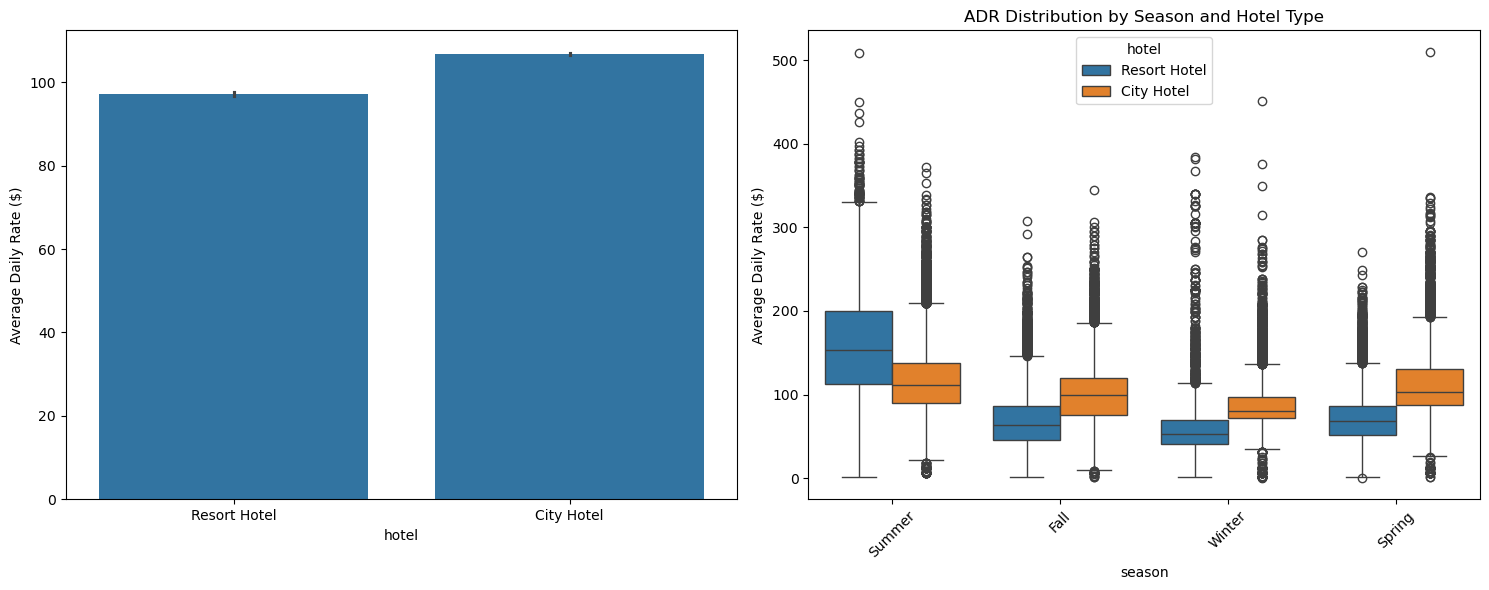


2. Seasonal ADR Analysis



3. Key Findings:

Resort Hotel:
• Highest ADR: Summer ($158.52)
• Lowest ADR: Winter ($60.63)
• Seasonal variation: 161.46%

City Hotel:
• Highest ADR: Summer ($116.13)
• Lowest ADR: Winter ($87.71)
• Seasonal variation: 32.4%


In [13]:
# Define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add season column based on arrival_date
df['season'] = df['arrival_date'].dt.month.apply(get_season)

# Calculate overall statistics
print("=== ADR Analysis by Hotel Type and Season ===\n")

# 1. Overall ADR by Hotel Type
hotel_adr = df.groupby('hotel')['adr'].agg(['mean', 'count', 'std']).round(2)
hotel_adr.columns = ['Average ADR', 'Number of Bookings', 'Standard Deviation']

# 2. ADR by Hotel Type and Season
hotel_season_adr = df.pivot_table(
    values='adr',
    index='hotel',
    columns='season',
    aggfunc=['mean', 'count', 'std']
).round(2)

# Reshape and rename columns for better presentation
hotel_season_stats = pd.DataFrame()
for stat in ['mean', 'count', 'std']:
    stat_df = hotel_season_adr[stat]
    stat_df.columns = [f'{season} ({stat})' for season in stat_df.columns]
    hotel_season_stats = pd.concat([hotel_season_stats, stat_df], axis=1)

# Sort columns by season and statistic
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
col_order = []
for season in season_order:
    col_order.extend([f'{season} (mean)', f'{season} (count)', f'{season} (std)'])
hotel_season_stats = hotel_season_stats[col_order]

# Display styled tables
print("1. Overall ADR by Hotel Type")
styled_hotel_adr = hotel_adr.style\
    .set_properties(**{
        'background-color': '#000000',
        'color': '#ffffff',
        'border-color': '#333333',
        'border-style': 'solid',
        'border-width': '1px',
        'padding': '10px',
        'text-align': 'left'
    })\
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#4CAF50'),
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('padding', '10px'),
                  ('text-align', 'left')]},
        {'selector': 'tr:hover',
         'props': [('background-color', '#1a1a1a')]}
    ])\
    .format({
        'Average ADR': '${:.2f}',
        'Standard Deviation': '${:.2f}'
    })

display(styled_hotel_adr)

# Create visualizations
plt.figure(figsize=(15, 6))

# 1. Bar plot of ADR by Hotel Type
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='hotel', y='adr', errorbar=('ci', 95))
plt.ylabel('Average Daily Rate ($)')

# 2. Box plot of ADR by Hotel Type and Season
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='season', y='adr', hue='hotel')
plt.title('ADR Distribution by Season and Hotel Type')
plt.ylabel('Average Daily Rate ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate and display seasonal trends
print("\n2. Seasonal ADR Analysis")
seasonal_analysis = df.pivot_table(
    values='adr',
    index='season',
    columns='hotel',
    aggfunc=['mean', 'count', 'std']
).round(2)

styled_seasonal = seasonal_analysis.style\
    .set_properties(**{
        'background-color': '#000000',
        'color': '#ffffff',
        'border-color': '#333333',
        'border-style': 'solid',
        'border-width': '1px',
        'padding': '10px',
        'text-align': 'left'
    })\
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#4CAF50'),
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('padding', '10px'),
                  ('text-align', 'left')]},
        {'selector': 'tr:hover',
         'props': [('background-color', '#1a1a1a')]}
    ])

display(styled_seasonal)

# Calculate and display percentage differences
print("\n3. Key Findings:")
for hotel_type in df['hotel'].unique():
    max_season = df[df['hotel'] == hotel_type].groupby('season')['adr'].mean().idxmax()
    min_season = df[df['hotel'] == hotel_type].groupby('season')['adr'].mean().idxmin()
    max_adr = df[(df['hotel'] == hotel_type) & (df['season'] == max_season)]['adr'].mean()
    min_adr = df[(df['hotel'] == hotel_type) & (df['season'] == min_season)]['adr'].mean()
    diff_percent = ((max_adr - min_adr) / min_adr * 100).round(2)
    
    print(f"\n{hotel_type}:")
    print(f"• Highest ADR: {max_season} (${max_adr:.2f})")
    print(f"• Lowest ADR: {min_season} (${min_adr:.2f})")
    print(f"• Seasonal variation: {diff_percent}%")

## Summary for Most profitable segments and channels (adjusted ADR).

=== COMPREHENSIVE ADR ANALYSIS SUMMARY ===


--- IS_CANCELED ---
Lowest ADR: False ($102.61, -1.0% from average)
Highest ADR: True ($105.39, 1.68% from average)
ADR Range: $2.780000000000001
Most common: False (62.64% of bookings)
Recommendation: Analyze cancellation patterns to develop targeted pricing strategies

--- MARKET_SEGMENT ---
Lowest ADR: Corporate ($71.49, -31.03% from average)
Highest ADR: Direct ($118.11, 13.95% from average)
ADR Range: $46.620000000000005
Most common: Online TA (47.47% of bookings)
Recommendation: Target more bookings from Direct segment; review pricing strategy for Corporate segment

--- DISTRIBUTION_CHANNEL ---
Lowest ADR: Corporate ($72.59, -29.97% from average)
Highest ADR: GDS ($123.0, 18.67% from average)
ADR Range: $50.41
Most common: TA/TO (82.31% of bookings)
Recommendation: Focus marketing efforts on GDS channel; negotiate better rates or reduce dependency on Corporate

--- DEPOSIT_TYPE ---
Lowest ADR: Refundable ($76.21, -26.47% from average)


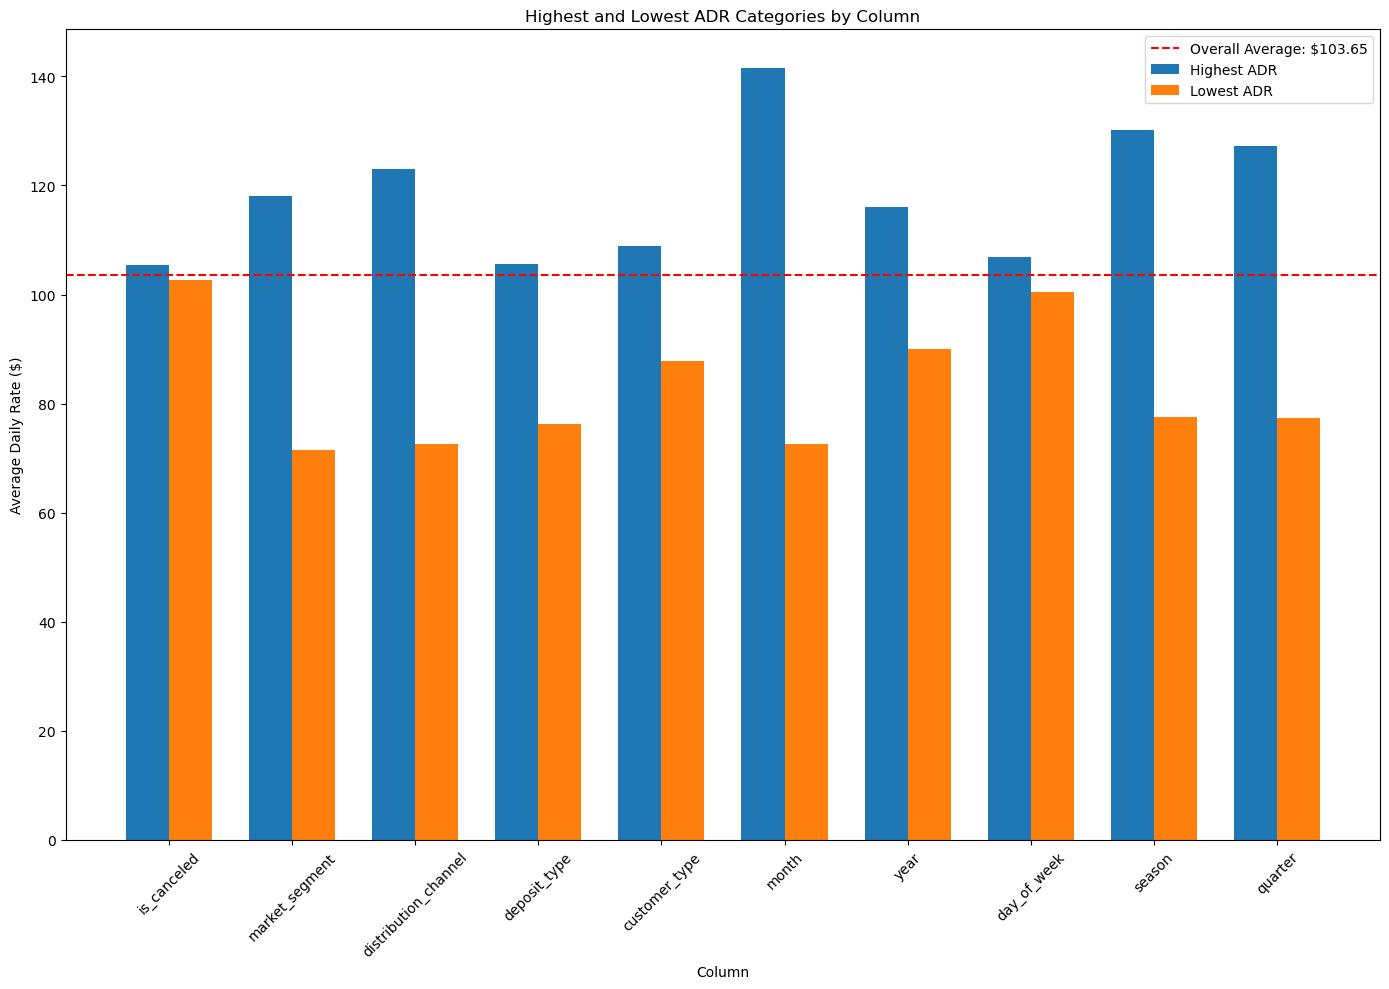


=== COMPREHENSIVE ACTION PLAN ===
Based on the analysis of ADR across multiple categories, here is a comprehensive action plan:

1. month Strategy:
   - Finding: August has $141.54 ADR vs. January with $72.57 ADR
   - Action: Implement seasonal pricing: increase rates during August and offer promotions during January to boost occupancy

2. season Strategy:
   - Finding: Summer has $130.19 ADR vs. Winter with $77.52 ADR
   - Action: Implement seasonal pricing strategy with higher rates during Summer and special offers during Winter

3. distribution_channel Strategy:
   - Finding: GDS has $123.0 ADR vs. Corporate with $72.59 ADR
   - Action: Focus marketing efforts on GDS channel; negotiate better rates or reduce dependency on Corporate

4. quarter Strategy:
   - Finding: 3 has $127.15 ADR vs. 1 with $77.36 ADR
   - Action: Develop quarterly business strategies with focused marketing during 1 to boost occupancy

5. market_segment Strategy:
   - Finding: Direct has $118.11 ADR vs. Corpor

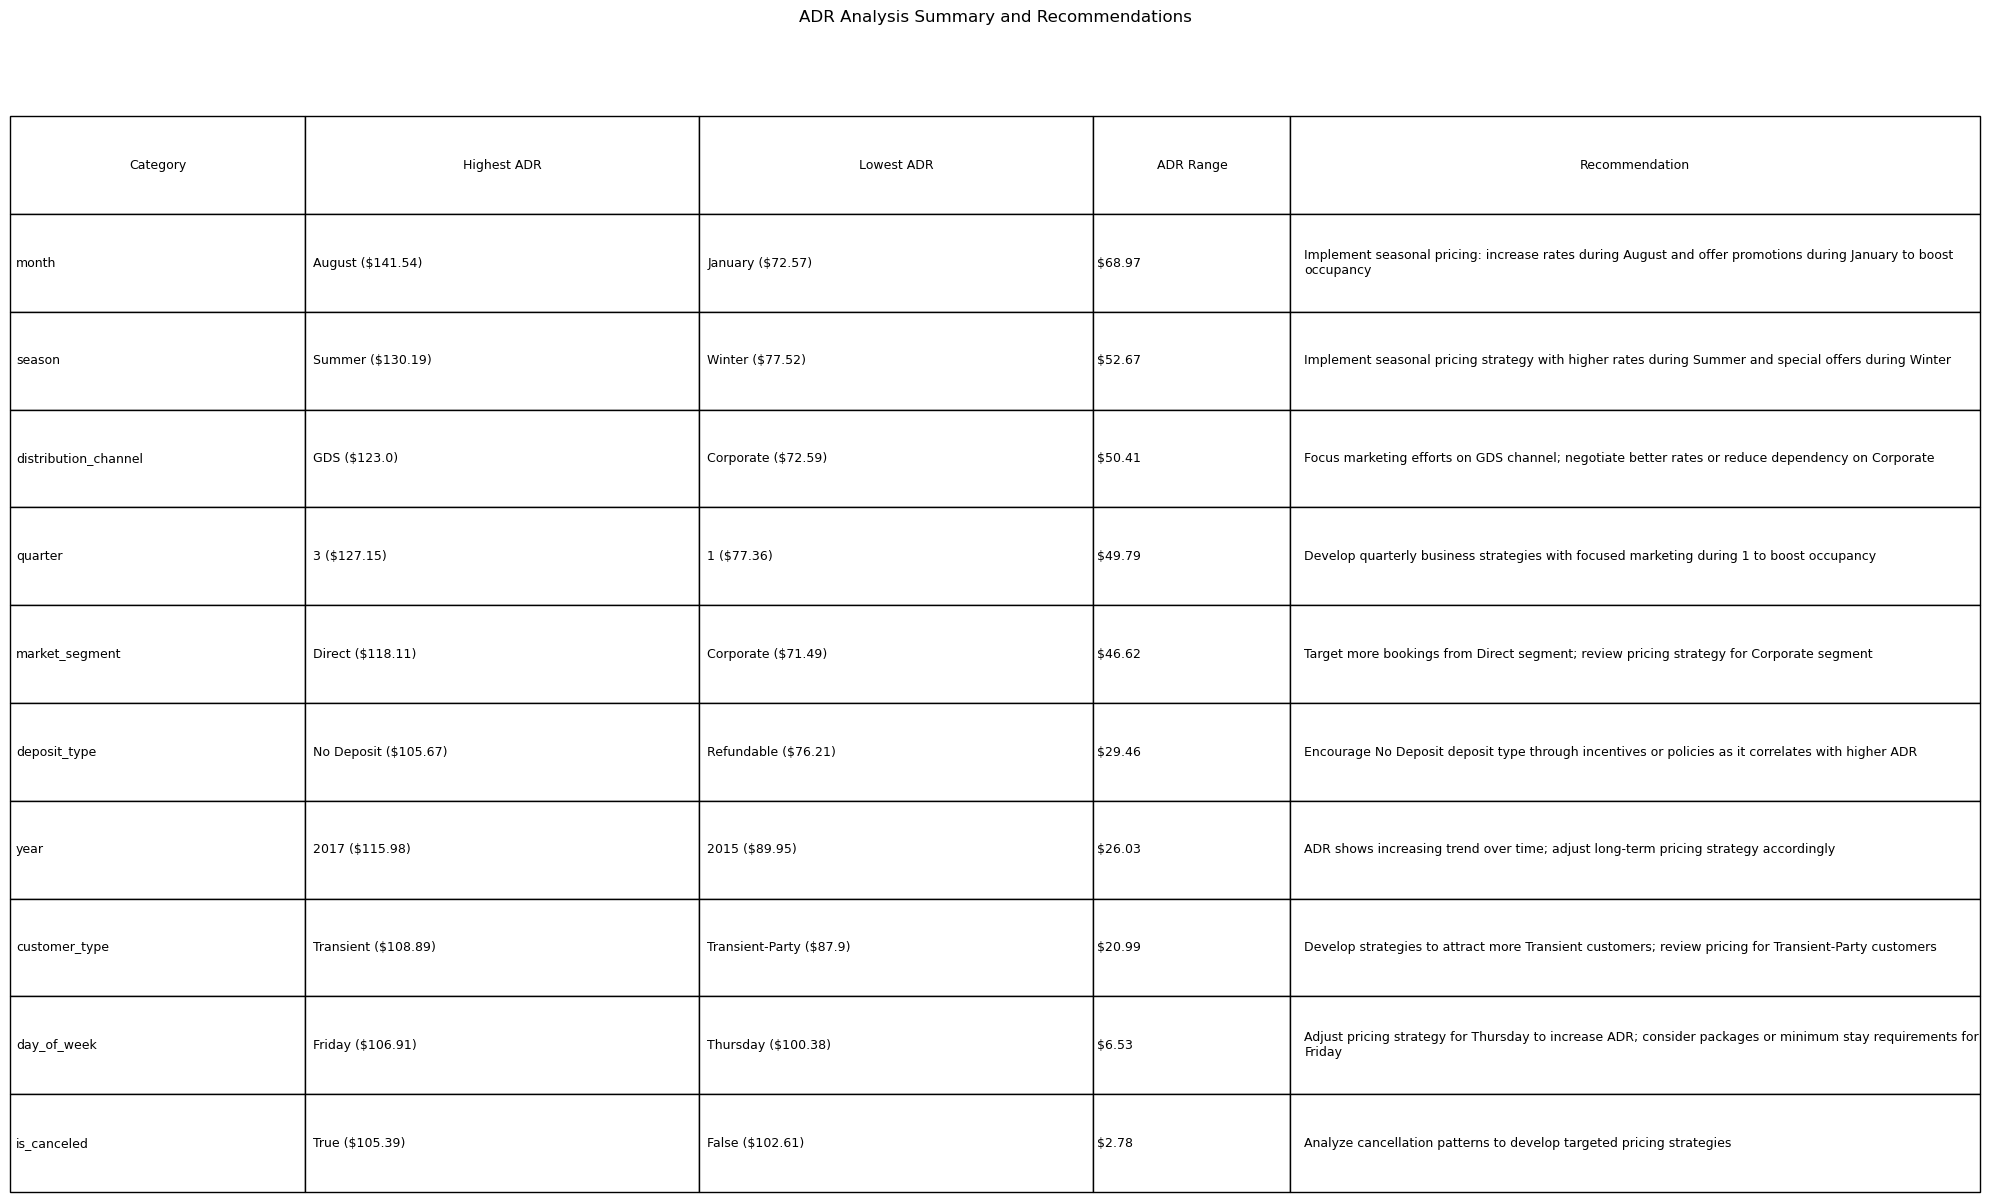

,Category,Highest ADR,Lowest ADR,ADR Range,Recommendation
1,MONTH,August ($141.54),January ($72.57),$68.97,Implement seasonal pricing: increase rates during August and offer promotions during January to boost occupancy
2,SEASON,Summer ($130.19),Winter ($77.52),$52.67,Implement seasonal pricing strategy with higher rates during Summer and special offers during Winter
3,DISTRIBUTION_CHANNEL,GDS ($123.00),Corporate ($72.59),$50.41,Focus marketing efforts on GDS channel; negotiate better rates or reduce dependency on Corporate
4,QUARTER,3 ($127.15),1 ($77.36),$49.79,Develop quarterly business strategies with focused marketing during 1 to boost occupancy
5,MARKET_SEGMENT,Direct ($118.11),Corporate ($71.49),$46.62,Target more bookings from Direct segment; review pricing strategy for Corporate segment
6,DEPOSIT_TYPE,No Deposit ($105.67),Refundable ($76.21),$29.46,Encourage No Deposit deposit type through incentives or policies as it correlates with higher ADR
7,YEAR,2017 ($115.98),2015 ($89.95),$26.03,ADR shows increasing trend over time; adjust long-term pricing strategy accordingly
8,CUSTOMER_TYPE,Transient ($108.89),Transient-Party ($87.90),$20.99,Develop strategies to attract more Transient customers; review pricing for Transient-Party customers
9,DAY_OF_WEEK,Friday ($106.91),Thursday ($100.38),$6.53,Adjust pricing strategy for Thursday to increase ADR; consider packages or minimum stay requirements for Friday
10,IS_CANCELED,True ($105.39),False ($102.61),$2.78,Analyze cancellation patterns to develop targeted pricing strategies


In [14]:
# Comprehensive summary of ADR analysis for all columns
print("=== COMPREHENSIVE ADR ANALYSIS SUMMARY ===\n")

# Create a DataFrame to store summary statistics
summary_data = []

# Function to analyze each column and provide recommendations
def analyze_column_impact(column_name):
    # Group by the column and calculate mean ADR
    grouped = df.groupby(column_name)['adr'].agg(['mean', 'count', 'std']).round(2)
    
    # Sort by mean ADR
    sorted_by_adr = grouped.sort_values('mean')
    
    # Get lowest and highest categories (safely)
    if len(sorted_by_adr) > 0:
        lowest_category = sorted_by_adr.index[0]
        lowest_adr = sorted_by_adr['mean'].iloc[0]
        
        highest_category = sorted_by_adr.index[-1]
        highest_adr = sorted_by_adr['mean'].iloc[-1]
        
        # Calculate percentage difference from overall average
        lowest_diff = ((lowest_adr - overall_adr_avg) / overall_adr_avg * 100).round(2)
        highest_diff = ((highest_adr - overall_adr_avg) / overall_adr_avg * 100).round(2)
        
        # Calculate impact range
        impact_range = highest_adr - lowest_adr
    else:
        lowest_category = "N/A"
        highest_category = "N/A"
        lowest_adr = 0
        highest_adr = 0
        lowest_diff = 0
        highest_diff = 0
        impact_range = 0
    
    # Calculate percentage of total bookings for each category
    grouped['percentage'] = (grouped['count'] / grouped['count'].sum() * 100).round(2)
    
    # Find the most common category
    most_common = grouped['count'].idxmax() if len(grouped) > 0 else "N/A"
    most_common_pct = grouped.loc[most_common, 'percentage'] if most_common != "N/A" else 0
    
    # Generate specific recommendations based on column and findings
    if column_name == 'is_canceled':
        # Check if we can safely compare the values
        if 0 in grouped.index and 1 in grouped.index:
            if grouped.loc[0, 'mean'] > grouped.loc[1, 'mean']:
                recommendation = "Consider investigating why non-canceled bookings have higher ADR - may indicate pricing strategy is effective"
            else:
                recommendation = "Implement strategies to reduce cancellations, especially for high-value bookings"
        else:
            recommendation = "Analyze cancellation patterns to develop targeted pricing strategies"
            
    elif column_name == 'month':
        recommendation = f"Implement seasonal pricing: increase rates during {highest_category} and offer promotions during {lowest_category} to boost occupancy"
            
    elif column_name == 'day_of_week':
        recommendation = f"Adjust pricing strategy for {lowest_category} to increase ADR; consider packages or minimum stay requirements for {highest_category}"
            
    elif column_name == 'market_segment':
        recommendation = f"Target more bookings from {highest_category} segment; review pricing strategy for {lowest_category} segment"
            
    elif column_name == 'distribution_channel':
        recommendation = f"Focus marketing efforts on {highest_category} channel; negotiate better rates or reduce dependency on {lowest_category}"
            
    elif column_name == 'deposit_type':
        recommendation = f"Encourage {highest_category} deposit type through incentives or policies as it correlates with higher ADR"
            
    elif column_name == 'customer_type':
        recommendation = f"Develop strategies to attract more {highest_category} customers; review pricing for {lowest_category} customers"
            
    elif column_name == 'year':
        years_list = sorted(grouped.index)
        if len(years_list) >= 2:
            latest_year = years_list[-1]
            earliest_year = years_list[0]
            year_trend = "increasing" if grouped.loc[latest_year, 'mean'] > grouped.loc[earliest_year, 'mean'] else "decreasing"
            recommendation = f"ADR shows {year_trend} trend over time; adjust long-term pricing strategy accordingly"
        else:
            recommendation = "Insufficient year data for trend analysis"
            
    elif column_name == 'season':
        recommendation = f"Implement seasonal pricing strategy with higher rates during {highest_category} and special offers during {lowest_category}"
            
    elif column_name == 'quarter':
        recommendation = f"Develop quarterly business strategies with focused marketing during {lowest_category} to boost occupancy"
    else:
        recommendation = "Review pricing strategy based on category performance"
    
    # Summarize findings
    print(f"\n--- {column_name.upper()} ---")
    print(f"Lowest ADR: {lowest_category} (${lowest_adr}, {lowest_diff}% from average)")
    print(f"Highest ADR: {highest_category} (${highest_adr}, {highest_diff}% from average)")
    print(f"ADR Range: ${impact_range}")
    print(f"Most common: {most_common} ({most_common_pct}% of bookings)")
    print(f"Recommendation: {recommendation}")
    
    # Add to summary data
    summary_data.append({
        'Column': column_name,
        'Lowest_ADR_Category': lowest_category,
        'Lowest_ADR': lowest_adr,
        'Lowest_ADR_Pct': lowest_diff,
        'Highest_ADR_Category': highest_category,
        'Highest_ADR': highest_adr,
        'Highest_ADR_Pct': highest_diff,
        'ADR_Range': impact_range,
        'Most_Common': most_common,
        'Most_Common_Pct': most_common_pct,
        'Recommendation': recommendation
    })
    
    # Return data for detailed visualization
    return grouped

# Analyze all columns
all_columns = standard_columns + time_columns
column_data = {}

for column in all_columns:
    column_data[column] = analyze_column_impact(column)

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Create a visualization summary of highest and lowest categories for each column
plt.figure(figsize=(14, 10))
plt.title('Highest and Lowest ADR Categories by Column')

# Prepare data for plotting
columns = summary_df['Column']
highest_adr = summary_df['Highest_ADR']
lowest_adr = summary_df['Lowest_ADR']

# Set up bar positions
x = np.arange(len(columns))
width = 0.35

# Plot bars
plt.bar(x - width/2, highest_adr, width, label='Highest ADR')
plt.bar(x + width/2, lowest_adr, width, label='Lowest ADR')

# Add labels and formatting
plt.xlabel('Column')
plt.ylabel('Average Daily Rate ($)')
plt.xticks(x, columns, rotation=45)
plt.axhline(y=overall_adr_avg, color='r', linestyle='--', label=f'Overall Average: ${overall_adr_avg:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Create a comprehensive action plan based on all findings
print("\n=== COMPREHENSIVE ACTION PLAN ===")
print("Based on the analysis of ADR across multiple categories, here is a comprehensive action plan:")

# Sort by ADR impact range to prioritize actions
summary_df = summary_df.sort_values('ADR_Range', ascending=False)
sorted_recommendations = summary_df

for i, row in enumerate(summary_df.iterrows()):
    idx, row_data = row
    print(f"\n{i+1}. {row_data['Column']} Strategy:")
    print(f"   - Finding: {row_data['Highest_ADR_Category']} has ${row_data['Highest_ADR']} ADR vs. {row_data['Lowest_ADR_Category']} with ${row_data['Lowest_ADR']} ADR")
    print(f"   - Action: {row_data['Recommendation']}")

# Create table visualization of recommendations
plt.figure(figsize=(20, 12))  # Increased figure size
plt.axis('off')
table_data = []
table_columns = ['Category', 'Highest ADR', 'Lowest ADR', 'ADR Range', 'Recommendation']

for idx, row in summary_df.iterrows():
    table_data.append([
        row['Column'],
        f"{row['Highest_ADR_Category']} (${row['Highest_ADR']})",
        f"{row['Lowest_ADR_Category']} (${row['Lowest_ADR']})",
        f"${row['ADR_Range']:.2f}",
        row['Recommendation']
    ])

# Create the table with adjusted parameters
table = plt.table(
    cellText=table_data,
    colLabels=table_columns,
    cellLoc='left',  # Align text to the left
    loc='center',
    bbox=[0, 0, 1, 1],
    colWidths=[0.15, 0.2, 0.2, 0.1, 0.35]  # Adjust column widths
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(9)  # Slightly smaller font size
table.scale(1.2, 2)  # Increased row height

# Auto-wrap text in cells
for cell in table._cells:
    table._cells[cell].set_text_props(wrap=True)
    table._cells[cell].set_height(0.1)  # Increased cell height
    
    # Add padding to cells
    table._cells[cell].PAD = 0.02

plt.title('ADR Analysis Summary and Recommendations', y=1.08)
plt.tight_layout()
plt.show()

# Create a more detailed DataFrame for display
detailed_recommendations = pd.DataFrame({
    'Category': sorted_recommendations['Column'].str.upper(),
    'Highest ADR': sorted_recommendations.apply(lambda x: f"{x['Highest_ADR_Category']} (${x['Highest_ADR']:.2f})", axis=1),
    'Lowest ADR': sorted_recommendations.apply(lambda x: f"{x['Lowest_ADR_Category']} (${x['Lowest_ADR']:.2f})", axis=1),
    'ADR Range': sorted_recommendations['ADR_Range'].apply(lambda x: f"${x:.2f}"),
    'Recommendation': sorted_recommendations['Recommendation']
})

# Reset index to show row numbers starting from 1
detailed_recommendations.index = range(1, len(detailed_recommendations) + 1)

# Display the table with styling
from IPython.display import display, HTML

# Apply styling to the DataFrame
styled_df = detailed_recommendations.style\
    .set_properties(**{
        'background-color': '#000000',  # Black background
        'color': '#ffffff',  # White text
        'border-color': '#333333',
        'border-style': 'solid',
        'border-width': '1px',
        'padding': '10px',
        'text-align': 'left'
    })\
    .set_table_styles([
        {'selector': 'th',  # Headers stay the same
         'props': [('background-color', '#4CAF50'),
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('padding', '10px'),
                  ('text-align', 'left')]},
        {'selector': 'tr:hover',
         'props': [('background-color', '#1a1a1a')]},  # Darker gray on hover
    ])\
    .set_caption('Detailed ADR Analysis and Recommendations')

# Display the styled table
display(styled_df)

## Conclusions Part 1: 

* Implement seasonal pricing: increase rates during August and offer promotions during January to boost occupancy.

* Focus marketing efforts on GDS channel (Travel agencies and Touroperatos); negotiate better rates, and possibly avoid coporate contracts or increase pricing for this ones if it is a obligation in the contract.

* Target more bookings from the Direct segment avoiding dependency on Travel Agents on Touroperators, since Direct bookings provide a much higher revenue: Marketing strategies, advertising etc... 

* Control pricing on Refundable, the cancellation rate on this is under the average cancellation average (22% vds 37%) but the pricing for refundable bookings should be higher and removed from bookings for high season (Summer).

* Adjust pricing strategy for Thursday to increase ADR; Consider packages or minimum stay requirements for Friday, to boost the weekend as a whole. The price variations in the City Hotel specially could be adapted to the different seasons. 




Dataset Shape: (118087, 30)

ADR Statistics:
count    118087.000000
mean        103.650920
std          46.410053
min           0.260000
25%          71.345000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

Null values in ADR: 0


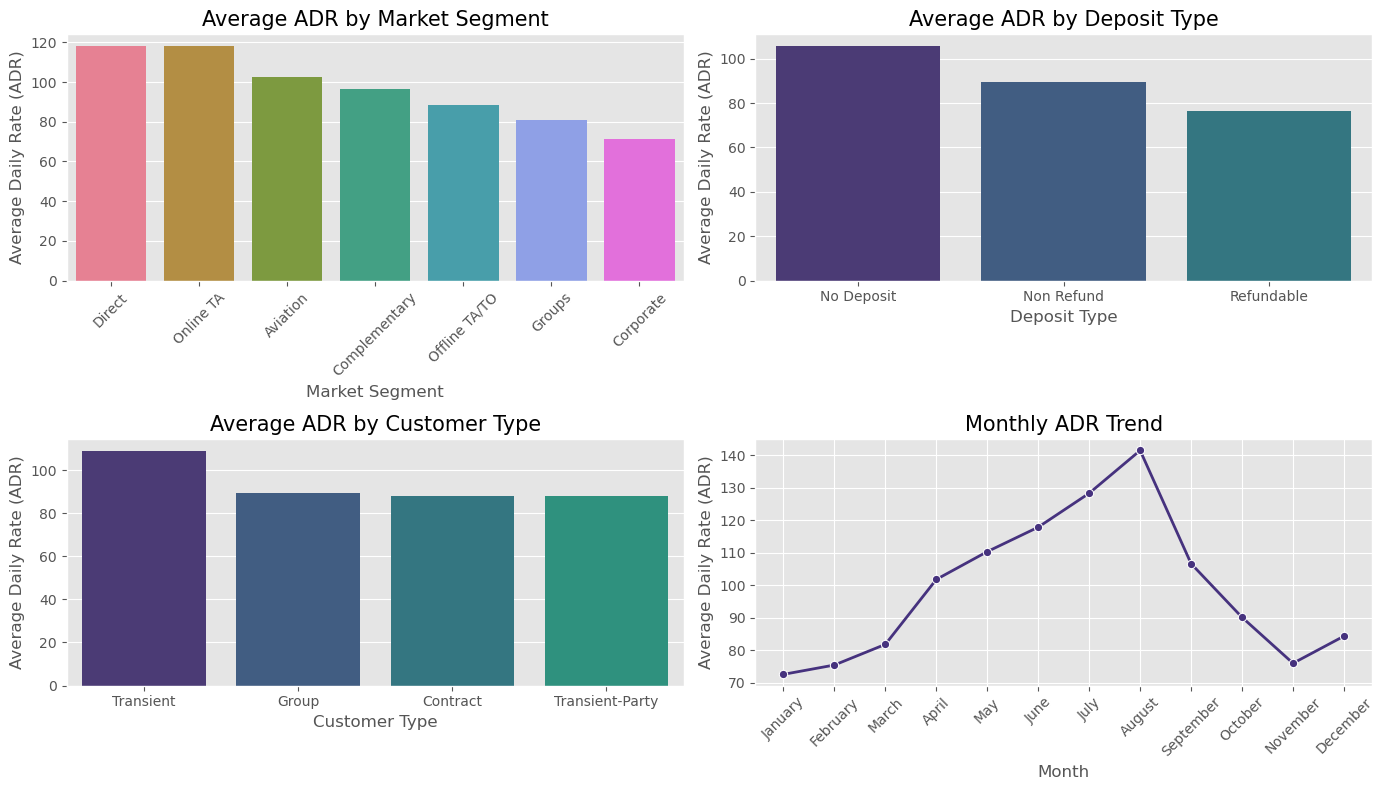

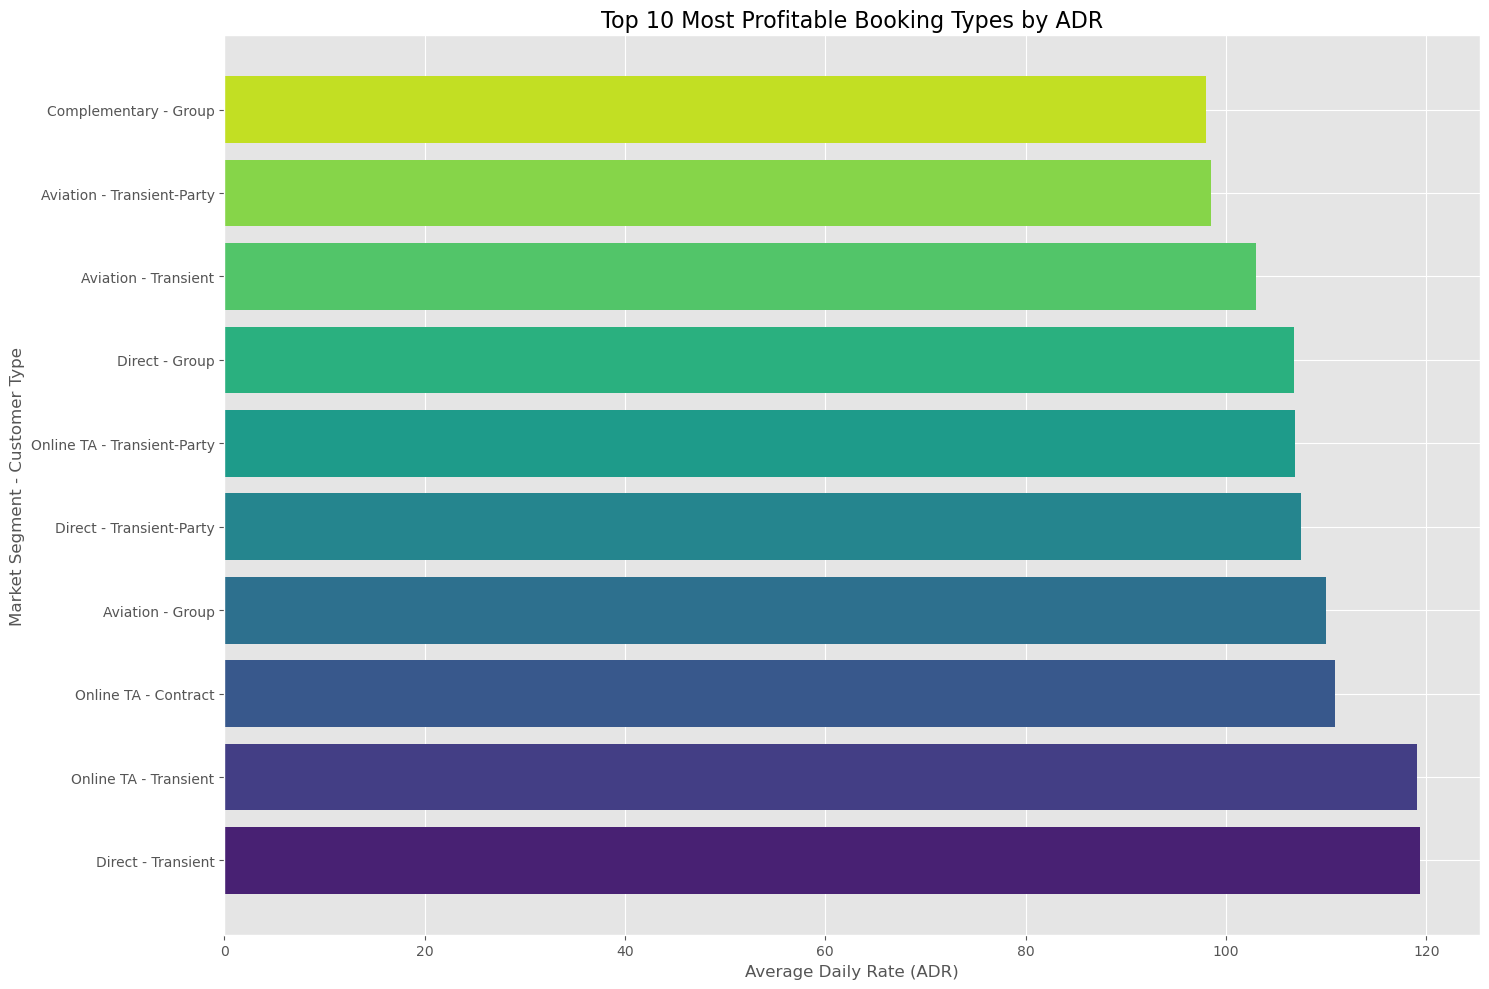

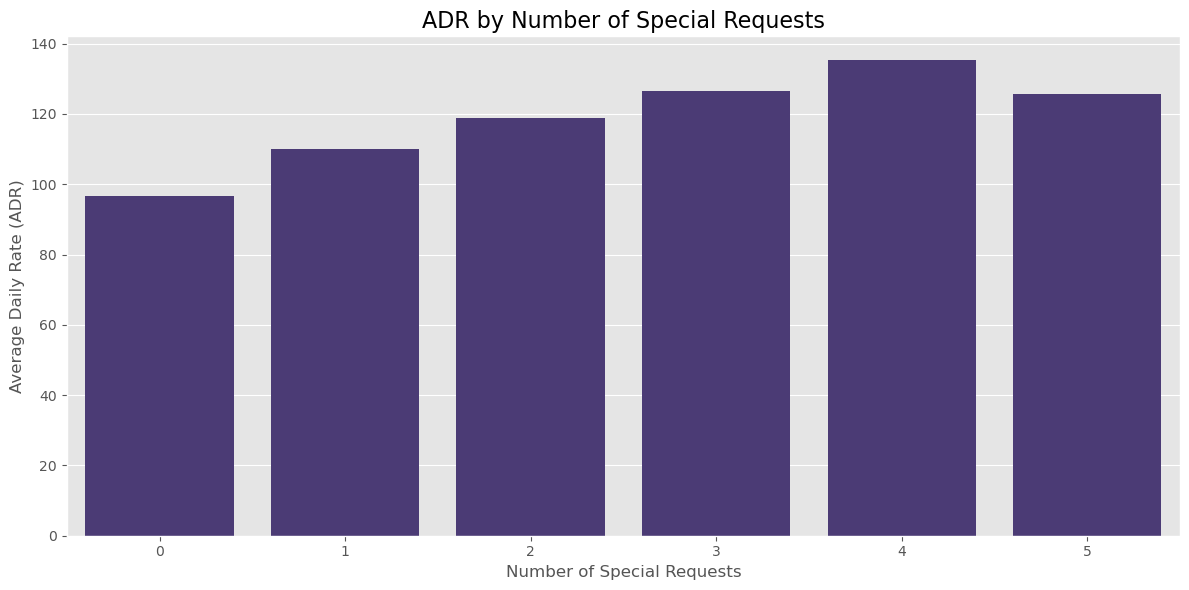

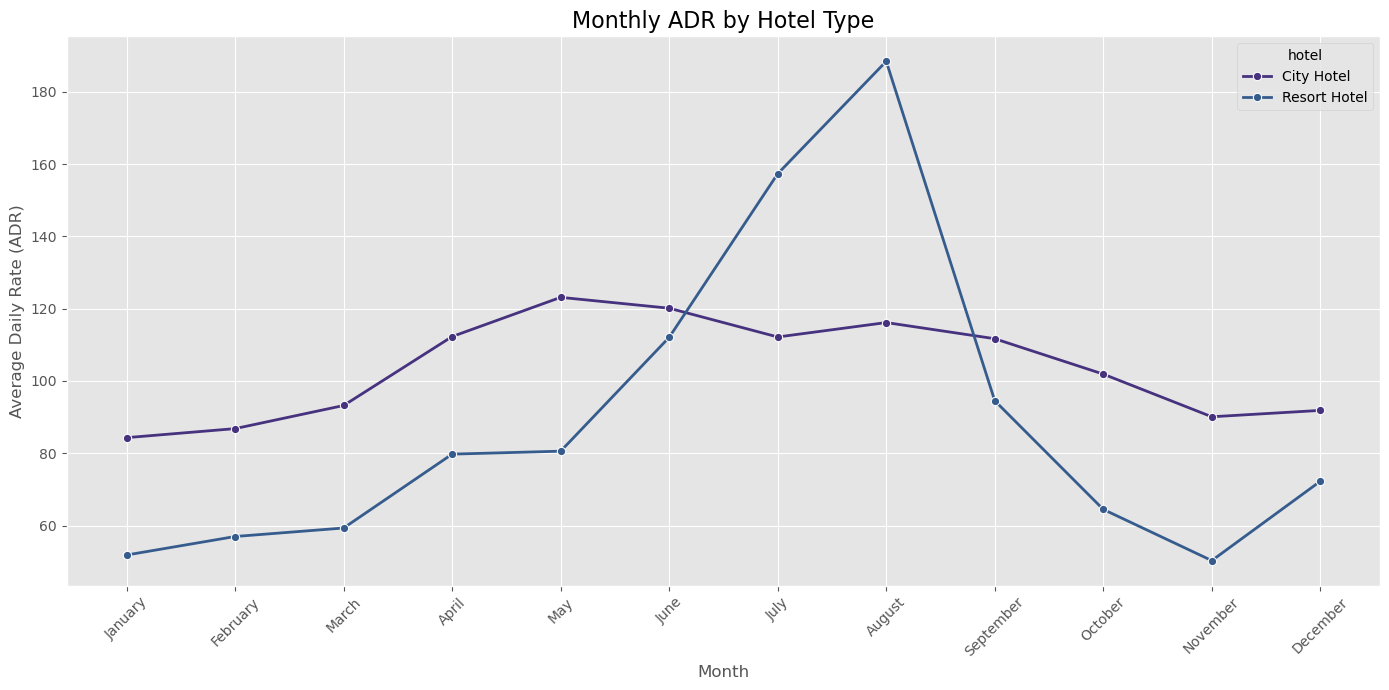

In [15]:

# Set visualization style
plt.style.use('ggplot')
sns.set_palette("viridis")

# Load the data
df = pd.read_csv('hotel_bookings_clean.csv', parse_dates=['arrival_date'])

# Basic exploration
print(f"Dataset Shape: {df.shape}")
print(f"\nADR Statistics:")
print(df['adr'].describe())
print(f"\nNull values in ADR: {df['adr'].isnull().sum()}")

# Calculate total stay length
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# ----- ANALYSIS BY INDIVIDUAL FACTORS -----

# 1. ADR by hotel type
adr_hotel = df.groupby('hotel', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 2. ADR by market segment
adr_market = df.groupby('market_segment', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 3. ADR by customer type
adr_customer = df.groupby('customer_type', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 4. ADR by deposit type
adr_deposit = df.groupby('deposit_type', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 5. ADR by distribution channel
adr_channel = df.groupby('distribution_channel', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 6. ADR by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
adr_month = df.groupby('arrival_date_month', observed=True)['adr'].agg(['mean', 'median', 'count', 'std'])

# 7. ADR by special requests
adr_requests = df.groupby('total_of_special_requests', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 8. ADR by length of stay
adr_stay = df.groupby('total_stay', observed=True)['adr'].agg(['mean', 'median', 'count', 'std'])
# Filter out stays with few bookings for clearer visualization
adr_stay_filtered = adr_stay[adr_stay['count'] > 100].sort_values('mean', ascending=False)

# ----- ANALYSIS BY COMBINATIONS OF FACTORS -----

# 9. ADR by hotel and market segment
adr_hotel_market = df.groupby(['hotel', 'market_segment'])['adr'].agg(['mean', 'count']).sort_values('mean', ascending=False)

# 10. ADR by market segment and customer type
adr_market_customer = df.groupby(['market_segment', 'customer_type'])['adr'].agg(['mean', 'count']).sort_values('mean', ascending=False)

# 11. ADR by market segment and deposit type
adr_market_deposit = df.groupby(['market_segment', 'deposit_type'])['adr'].agg(['mean', 'count']).sort_values('mean', ascending=False)
# ----- VISUALIZATIONS -----

# Set up the figure size for all plots
plt.figure(figsize=(14, 8))

# 1. Market Segment Chart
plt.subplot(2, 2, 1)
sns.barplot(x=adr_market.index, y=adr_market['mean'], hue=adr_market.index, legend=False)
plt.title('Average ADR by Market Segment', fontsize=15)
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)

# 2. Deposit Type Chart
plt.subplot(2, 2, 2)
sns.barplot(x=adr_deposit.index, y=adr_deposit['mean'], hue=adr_deposit.index, legend=False)
plt.title('Average ADR by Deposit Type', fontsize=15)
plt.xlabel('Deposit Type')
plt.ylabel('Average Daily Rate (ADR)')

# 3. Customer Type Chart
plt.subplot(2, 2, 3)
sns.barplot(x=adr_customer.index, y=adr_customer['mean'], hue=adr_customer.index, legend=False)
plt.title('Average ADR by Customer Type', fontsize=15)
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')

# 4. Monthly Trend Chart
plt.subplot(2, 2, 4)
sns.lineplot(x=adr_month.index, y=adr_month['mean'], marker='o', linewidth=2)
plt.title('Monthly ADR Trend', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Combinations analysis visualization
plt.figure(figsize=(15, 10))

# Top 10 most profitable combinations
top_combos = adr_market_customer.head(10).reset_index()
plt.barh(y=[f"{m} - {c}" for m, c in zip(top_combos['market_segment'], top_combos['customer_type'])], 
         width=top_combos['mean'],
         color=sns.color_palette('viridis', 10))
plt.title('Top 10 Most Profitable Booking Types by ADR', fontsize=16)
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Market Segment - Customer Type')
plt.tight_layout()
plt.show()

# Special requests correlation with ADR
plt.figure(figsize=(12, 6))
sns.barplot(x=adr_requests.index, y=adr_requests['mean'])
plt.title('ADR by Number of Special Requests', fontsize=16)
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show()

# Monthly ADR by hotel type
monthly_hotel = df.groupby(['hotel', 'arrival_date_month'], observed=True)['adr'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_hotel, x='arrival_date_month', y='adr', hue='hotel', marker='o', linewidth=2)
plt.title('Monthly ADR by Hotel Type', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## What if we include the cancellations in the mix?


8. ADR by Cancellation Status:
   is_canceled        mean  median  count        std
0        False  102.612350    95.0  73973  46.864696
1         True  105.392455    97.0  44114  45.584969

Cancellation Rate by Market Segment (%):
  market_segment  cancellation_rate
4         Groups          61.217981
6      Online TA          36.967264
5  Offline TA/TO          34.467092
0       Aviation          22.077922
2      Corporate          19.319082
3         Direct          15.588642
1  Complementary          12.201964

Cancellation Rate by Deposit Type (%):
  deposit_type  cancellation_rate
1   Non Refund          99.361790
0   No Deposit          28.638743
2   Refundable          22.222222

Market Segments by Expected ADR (accounting for cancellations):
  market_segment  cancellation_rate     avg_adr  expected_adr
3         Direct          15.588642  118.110782     99.698915
1  Complementary          12.201964   96.624222     84.834169
0       Aviation          22.077922  102.743203     

/tmp/ipykernel_105921/1427532929.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_cancel = df.groupby('lead_time_bucket').agg({


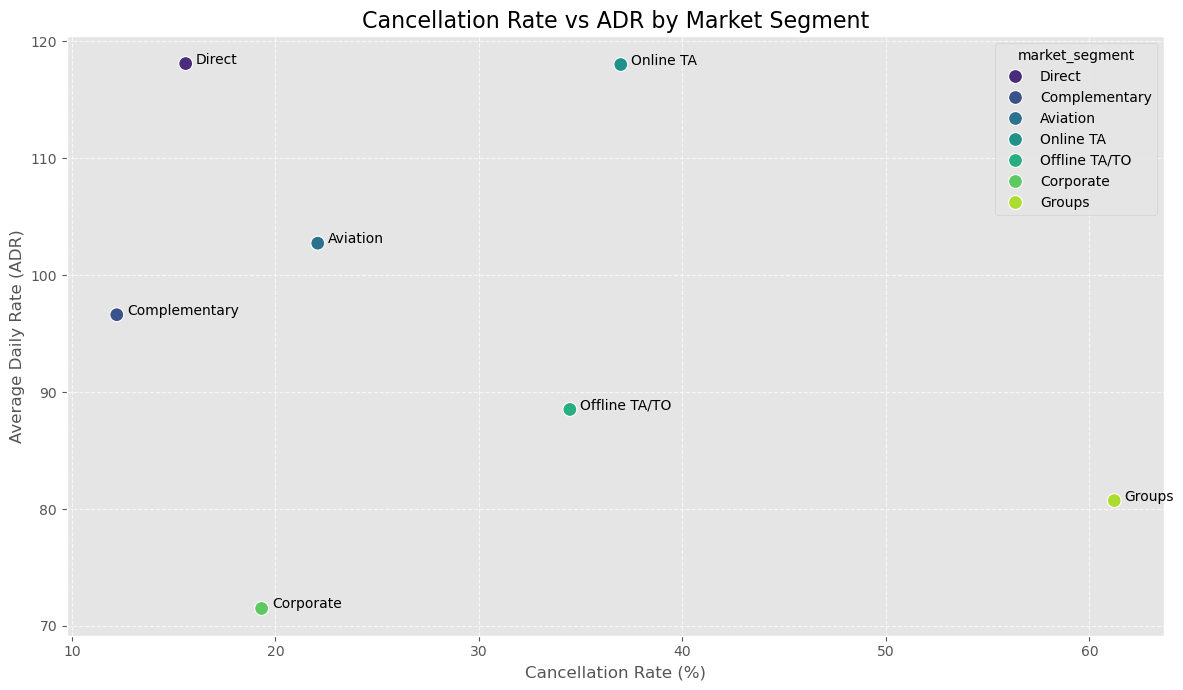

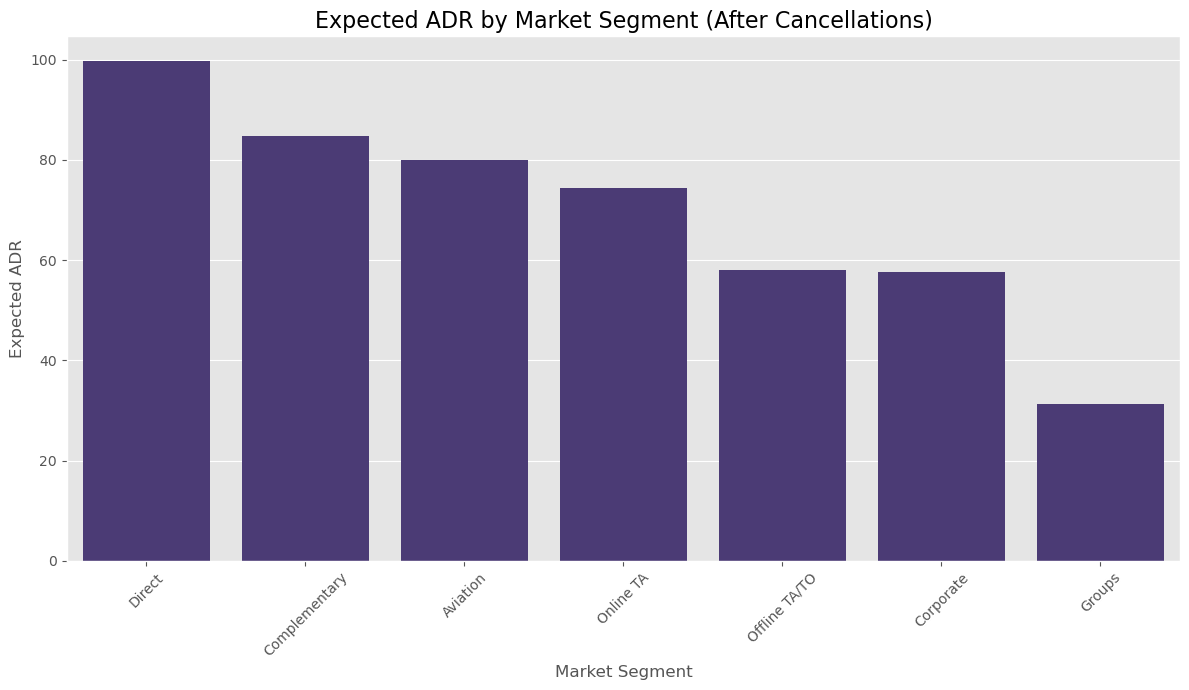

In [16]:
# ----- CANCELLATION ANALYSIS -----

# 1. ADR by cancellation status
adr_canceled = df.groupby('is_canceled')['adr'].agg(['mean', 'median', 'count', 'std']).reset_index()
print("\n8. ADR by Cancellation Status:")
print(adr_canceled)

# 2. Cancellation rate by market segment
cancel_by_segment = df.groupby('market_segment')['is_canceled'].mean().reset_index()
cancel_by_segment.columns = ['market_segment', 'cancellation_rate']
cancel_by_segment['cancellation_rate'] = cancel_by_segment['cancellation_rate'] * 100  # Convert to percentage
cancel_by_segment = cancel_by_segment.sort_values('cancellation_rate', ascending=False)
print("\nCancellation Rate by Market Segment (%):")
print(cancel_by_segment)

# 3. Cancellation rate by deposit type
cancel_by_deposit = df.groupby('deposit_type')['is_canceled'].mean().reset_index()
cancel_by_deposit.columns = ['deposit_type', 'cancellation_rate']
cancel_by_deposit['cancellation_rate'] = cancel_by_deposit['cancellation_rate'] * 100  # Convert to percentage
cancel_by_deposit = cancel_by_deposit.sort_values('cancellation_rate', ascending=False)
print("\nCancellation Rate by Deposit Type (%):")
print(cancel_by_deposit)

# 4. ADR and cancellation rate combined analysis
segment_cancel_adr = df.groupby('market_segment').agg({
    'is_canceled': 'mean',
    'adr': 'mean'
}).reset_index()
segment_cancel_adr.columns = ['market_segment', 'cancellation_rate', 'avg_adr']
segment_cancel_adr['cancellation_rate'] = segment_cancel_adr['cancellation_rate'] * 100
segment_cancel_adr['expected_adr'] = segment_cancel_adr['avg_adr'] * (1 - segment_cancel_adr['cancellation_rate']/100)
segment_cancel_adr = segment_cancel_adr.sort_values('expected_adr', ascending=False)
print("\nMarket Segments by Expected ADR (accounting for cancellations):")
print(segment_cancel_adr)

# 5. Lead time vs cancellation analysis
df['lead_time_bucket'] = pd.cut(df['lead_time'], bins=[0, 30, 90, 180, 365, df['lead_time'].max()], 
                              labels=['0-30 days', '31-90 days', '91-180 days', '181-365 days', '>365 days'])
lead_cancel = df.groupby('lead_time_bucket').agg({
    'is_canceled': 'mean',
    'adr': 'mean'
}).reset_index()
lead_cancel.columns = ['lead_time_bucket', 'cancellation_rate', 'avg_adr']
lead_cancel['cancellation_rate'] = lead_cancel['cancellation_rate'] * 100
lead_cancel['expected_adr'] = lead_cancel['avg_adr'] * (1 - lead_cancel['cancellation_rate']/100)
print("\nLead Time vs Cancellation Rate and ADR:")
print(lead_cancel)

# ----- VISUALIZATIONS FOR CANCELLATION ANALYSIS -----

""" # 1. ADR by cancellation status
plt.figure(figsize=(10, 6))
sns.barplot(x=adr_canceled['is_canceled'].map({True: 'Canceled', False: 'Not Canceled'}), 
            y=adr_canceled['mean'])
plt.title('ADR by Cancellation Status', fontsize=16)
plt.xlabel('Booking Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show() """

# 2. Cancellation rate vs ADR by market segment
plt.figure(figsize=(12, 7))
sns.scatterplot(data=segment_cancel_adr, x='cancellation_rate', y='avg_adr', s=100, 
               hue='market_segment', palette='viridis')
for i, row in segment_cancel_adr.iterrows():
    plt.annotate(row['market_segment'], (row['cancellation_rate']+0.5, row['avg_adr']), fontsize=10)
plt.title('Cancellation Rate vs ADR by Market Segment', fontsize=16)
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Expected ADR (after accounting for cancellations)
plt.figure(figsize=(12, 7))
sns.barplot(x=segment_cancel_adr['market_segment'], y=segment_cancel_adr['expected_adr'])
plt.title('Expected ADR by Market Segment (After Cancellations)', fontsize=16)
plt.xlabel('Market Segment')
plt.ylabel('Expected ADR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Additional recommendations regarding cancellations:
1. Implement stricter cancellation policies for segments with high cancellation rates
2. Consider overbooking strategies based on historical cancellation patterns
3. Offer incentives for early bookings with non-refundable options
4. Target marketing toward segments with lower cancellation rates
5. Analyze lead time patterns to optimize booking acceptance strategies
6. Focus on market segments with the highest expected ADR after cancellations: Direct and Complementary

## Summary :
    Pricing & Seasonality: Adjust rates seasonally (higher in August, promotions in January) while tightening refundable policies in peak seasons to maximize revenue.

    Channel Strategy: Prioritize GDS (negotiate better rates) and aggressively target Direct bookings (higher revenue) to balance dependency on intermediaries.

    Cancellation Management: Stricter policies for high-cancellation segments combined with overbooking strategies and non-refundable incentives to optimize occupancy.

    ADR Optimization: Raise Thursday pricing and introduce Friday packages/minimum stays to boost weekend revenue while focusing on high-ADR segments (Direct/Complementary).

    Marketing Focus: Align campaigns with low-cancellation, high-ADR segments and leverage lead time analysis to refine booking acceptance timing.